## 맨 첨에 문제 접근 시 메모한 것

* 천천히 생각하면서 메모하니 그냥 구현문제인 것 같은데

* 일단 모든 기둥 폭(너비 = 1)
* 창고에(=지붕에) 모든 기둥 포함되어야

* 지붕은 모두 연결
* 지붕 가장자리는 땅에 닿아야
* 오목하게 들어간 부분( U 이런거 ) 없어야함

* 한 개 기둥의 면적 = y좌표값
* x축 ++ 하면서 
  - answer += arr[1] 하는데 그 전에 
  - if arr[1] = y좌표가 "ny > y"로 다음꺼가 더 클 때 answer += y의 y를 ny로 바꿈
  - else 같거나 작으면 answer += y 의 y는 그대로
  
* 이때 plus해주는 값을 한번만 하는게 아니라

In [8]:
''' (정답아님!)내가 푼 - 근데 이 경우는 기둥들이 다 붙어있는 경우에만 가능한 답이네 '''
"""                      그리고 그림 기준으로 x = 9부터는 이게 안됨 """
answer = 0
n = int(input())
graph = [list(map(int, input().split())) for _ in range(n)]   # (x, y)

graph.sort()         # x좌표 기준 정렬

plus = graph[0][1]

for i in range(1, n):   # 이러면 x축 기준으로 하나씩 진행이니까
    if plus >= graph[i][1]:   # 현재가 다음보다 크거나 같으면
        answer += plus
    elif plus < graph[i][1]:  # 이해를 위해 이렇게 작성
        plus = graph[i][1]
        answer += plus
print(answer)

7
2 4
11 4
15 8
4 6
5 3
8 10
13 6
52


하다보니 이 접근이 이상하다는걸 인지함
 - 힌트 찾아볼까 해서 검색해보니
 - "스택"을 사용하라더라


In [20]:
''' 블로그 참고하여 수행 - 이 유형 핵심은 top을 기준으로 반반 나눠서 수행 '''
answer = 0
n = int(input())

graph = [0] * 1001    # 문제에서 0<=x<=1000 이라 했으므로
max_h = 0
max_h_idx = 0
end_idx = 0

# 그림 모양의 n x n 배열 생성 (입력 받으면서 큰값 저장)
for _ in range(n):
    idx, h = map(int, input().split())   # (중요) 이때 x, y가 아니라 index, 높이 이다
    graph[idx] = h                   # (중요) 해당 위치에 높이(=넓이) 저장
    
    # 높이 기준 가장 큰값 저장
    if h > max_h:
        max_h = h                # 가장 높은 애
        max_h_idx = idx          # 걔의 인덱스(위치)
    end_idx = max(end_idx, idx)  # 배열의 끝인 1000회까지 가지 않도록 마지막 위치 저장

# 왼쪽 수행 - 내가 생각한 방식은 여기서 통함
plus = graph[0]
for idx in range(1, max_h_idx+1):    # 이러면 x축 기준으로 하나씩 진행이니까
    if plus < graph[idx]:          # next 위치의 높이가 더 큰 값이면 대체
        plus = graph[idx]          # 왼쪽으로 갈 땐, 다음 위치 높이가 0 이어도 상관없다
    answer += plus

# 오른쪽 수행 - 위 내용을 거꾸로!!!!!!!! (중요)
plus = graph[end_idx]
for idx in range(end_idx, max_h_idx, -1):    # 이러면 x축 기준으로 하나씩 진행이니까
    if plus < graph[idx]:          # next 위치의 높이가 더 큰 값이면 대체
        plus = graph[idx]          # 왼쪽으로 갈 땐, 다음 위치 높이가 0 이어도 상관없다
    answer += plus
    
print(answer)

7
2 4
11 4
15 8
4 6
5 3
8 10
13 6


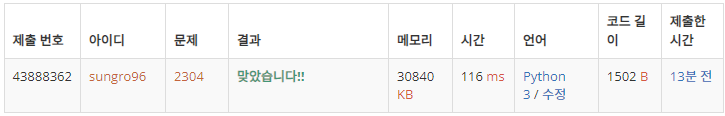

In [17]:
graph = [[2, 4], [4, 6], [5, 3], [8, 10], [11, 4], [13, 6], [15, 8]]

graph[:][1].sort()         # x좌표 기준 정렬
print(graph)

[[2, 4], [4, 6], [5, 3], [8, 10], [11, 4], [13, 6], [15, 8]]


In [21]:
answer

98

In [ ]:
'''   
# 내가 생각한 방법은 여기서 먹힘 -> 단, stack으로 진행
stack = []
for idx in range(max_h_idx):       # 가장 높은 애 위치까지 1차 진행
    stack.append(graph[idx])
    
    if stack[-1] < graph[idx+1]:
        stack.append(graph[idx+1])
    answer += stack[-1]
'''
